In [1]:
# kill previous docker
# sudo docker container ls
# sudo docker rm <>
# sudo docker rm -v -f $(sudo docker ps -qa)

# bash command to run local datajoint server
# sudo docker run -p 3306:3306 -e MYSQL_ROOT_PASSWORD=simple datajoint/mysql

# configure mysql server
# mysql > CREATE USER 'root'@'%' IDENTIFIED BY 'simple';
# mysql > GRANT ALL PRIVILEGES ON *.* TO 'root'@'%';
# sudo service mysql stop


In [2]:
from dj_connection import connect_noTLS

# connect first
connect_noTLS()

[2023-08-02 16:40:18,720][INFO]: Connecting root@0.0.0.0:3306
[2023-08-02 16:40:18,722][INFO]: Connected root@0.0.0.0:3306


In [3]:
from foundation_tables import Mouse

# First, add our mice
mice = [{"prefix" : "RL1" , "mouse_id" : 1},
        {"prefix" : "RL2" , "mouse_id" : 1},
        {"prefix" : "RL1" , "mouse_id" : 2},
        {"prefix" : "RL1" , "mouse_id" : 3},
        {"prefix" : "RL1" , "mouse_id" : 4},
        {"prefix" : "RL1" , "mouse_id" : 5},
        {"prefix" : "RL2" , "mouse_id" : 5},
        ]
mouse = Mouse()
mouse.insert(mice, skip_duplicates=True)
Mouse() # should now show RL1_1 and RL1_5 in table

prefix mouse training group,mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
RL1,1,None,None
RL1,2,None,None
RL1,3,None,None
RL1,4,None,None
RL1,5,None,None
RL2,1,None,None
RL2,5,None,None


In [4]:
from foundation_tables import Date
from dj_utils import update_date

# Next, add dates when we collected data for these mice
update_date()
Date() # should now show 6 dates in 2022-01

session_date date where we had some form of data collection
2021-10-27
2021-10-28
2021-10-29
2021-10-30
2022-01-12
2022-01-13
2022-01-14
2022-01-15
2022-01-16
2022-01-25


In [5]:
from foundation_tables import BehaviorSession

# Now, run populate calls on BehaviorSession and PhotometrySession 
BehaviorSession().populate()

# should now see these two having 10 entries 
BehaviorSession()

Processed new behavior session from RL1 2 2021-10-27 

Processed new behavior session from RL1 3 2021-10-27 

Processed new behavior session from RL1 2 2021-10-28 

Processed new behavior session from RL1 3 2021-10-28 

Processed new behavior session from RL1 2 2021-10-29 

Processed new behavior session from RL1 3 2021-10-29 

Processed new behavior session from RL1 3 2021-10-30 

Processed new behavior session from RL1 1 2022-01-12 

Processed new behavior session from RL1 4 2022-01-12 

Processed new behavior session from RL1 5 2022-01-12 

Processed new behavior session from RL1 1 2022-01-13 

Processed new behavior session from RL1 4 2022-01-13 

Processed new behavior session from RL1 5 2022-01-13 

Processed new behavior session from RL1 1 2022-01-14 

Processed new behavior session from RL1 4 2022-01-14 

Processed new behavior session from RL1 5 2022-01-14 

Processed new behavior session from RL1 5 2022-01-15 

Processed new behavior session from RL1 1 2022-01-16 

Processed 

prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,beha_session_time time of session,beha_path path to behavior data,"beha_data matrix of behavior data, flexible to task"
RL1,1,2022-01-12,16_39_06,./mouse_data/RL1/1/20220112/behavior2022-01-12T16_39_06.csv,=BLOB=
RL1,1,2022-01-13,18_14_22,./mouse_data/RL1/1/20220113/behavior2022-01-13T18_14_22.csv,=BLOB=
RL1,1,2022-01-14,15_14_10,./mouse_data/RL1/1/20220114/behavior2022-01-14T15_14_10.csv,=BLOB=
RL1,1,2022-01-16,17_38_14,./mouse_data/RL1/1/20220116/behavior2022-01-16T17_38_14.csv,=BLOB=
RL1,1,2022-01-25,16_42_21,./mouse_data/RL1/1/20220125/behavior2022-01-25T16_42_21.csv,=BLOB=
RL1,2,2021-10-27,12_03_17,./mouse_data/RL1/2/20211027/behavior2021-10-27T12_03_17.csv,=BLOB=
RL1,2,2021-10-28,14_26_14,./mouse_data/RL1/2/20211028/behavior2021-10-28T14_26_14.csv,=BLOB=
RL1,2,2021-10-29,13_42_57,./mouse_data/RL1/2/20211029/behavior2021-10-29T13_42_57.csv,=BLOB=
RL1,3,2021-10-27,16_17_39,./mouse_data/RL1/3/20211027/behavior2021-10-27T16_17_39.csv,=BLOB=
RL1,3,2021-10-28,15_16_11,./mouse_data/RL1/3/20211028/behavior2021-10-28T15_16_11.csv,=BLOB=


In [6]:
from foundation_tables import PhotometrySession

# populate it
PhotometrySession().populate() 

# see what's in it
PhotometrySession()

Processed new photometry session from RL1 2 2021-10-27 

Processed new photometry session from RL1 3 2021-10-27 

Processed new photometry session from RL1 2 2021-10-28 

Processed new photometry session from RL1 3 2021-10-28 

Processed new photometry session from RL1 2 2021-10-29 

Processed new photometry session from RL1 3 2021-10-29 

Processed new photometry session from RL1 3 2021-10-30 

Processed new photometry session from RL1 1 2022-01-12 

Processed new photometry session from RL1 4 2022-01-12 

Processed new photometry session from RL1 5 2022-01-12 

Processed new photometry session from RL1 1 2022-01-13 

Processed new photometry session from RL1 4 2022-01-13 

Processed new photometry session from RL1 5 2022-01-13 

Processed new photometry session from RL1 1 2022-01-14 

Processed new photometry session from RL1 4 2022-01-14 

Processed new photometry session from RL1 5 2022-01-14 

Processed new photometry session from RL1 5 2022-01-15 

Processed new photometry sessio

prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,photometry_path path to photometry data
RL1,1,2022-01-12,16_42_30,./mouse_data/RL1/1/20220112/Photometry2022-01-12T16_42_30.csv
RL1,1,2022-01-13,18_17_49,./mouse_data/RL1/1/20220113/Photometry2022-01-13T18_17_49.csv
RL1,1,2022-01-14,15_17_43,./mouse_data/RL1/1/20220114/Photometry2022-01-14T15_17_43.csv
RL1,1,2022-01-16,17_41_23,./mouse_data/RL1/1/20220116/Photometry2022-01-16T17_41_23.csv
RL1,1,2022-01-25,16_45_35,./mouse_data/RL1/1/20220125/Photometry2022-01-25T16_45_35.csv
RL1,2,2021-10-27,12_03_17,./mouse_data/RL1/2/20211027/Photometry2021-10-27T12_03_17.csv
RL1,2,2021-10-28,14_26_14,./mouse_data/RL1/2/20211028/Photometry2021-10-28T14_26_14.csv
RL1,2,2021-10-29,13_42_57,./mouse_data/RL1/2/20211029/Photometry2021-10-29T13_42_57.csv
RL1,3,2021-10-27,16_17_39,./mouse_data/RL1/3/20211027/Photometry2021-10-27T16_17_39.csv
RL1,3,2021-10-28,15_16_11,./mouse_data/RL1/3/20211028/Photometry2021-10-28T15_16_11.csv


In [7]:
from photometry_preprocessing import PhotometryPreprocessingParam

# Now add in some parameters to preprocess our photometry data
# This corrects for motion artifacts and changes in the baseline fluorescence
preprocessing_params0 = {
    'photometry_preprocessing_param_id' : 0 ,
    "median_filt_kernel_size" : 5,
    "lowpass_filter_frequency" : 10,
    "photobleaching_estim_method" : "polyFit_baseline",
    "photobleaching_estim_params" : {"polyfit_deg" : 4},
    "baseline_fluorescence_signal" : 'denoised',
    "baseline_fluorescence_lowpass_freq" : 0.001
}
PhotometryPreprocessingParam().insert1(preprocessing_params0, skip_duplicates = True)

PhotometryPreprocessingParam() # should now see one parameter set, using the polyFit_baseline method

photometry_preprocessing_param_id unique id for photometry preprocessing parameter set,median_filt_kernel_size,lowpass_filter_frequency,photobleaching_estim_method,photobleaching_estim_params,baseline_fluorescence_signal,baseline_fluorescence_lowpass_freq
0,5,10,polyFit_baseline,=BLOB=,denoised,0.001


In [8]:
from photometry_preprocessing import ProcessedPhotometry

# Now populate ProcessedPhotometry 
ProcessedPhotometry().populate() 
ProcessedPhotometry() # you should now see 10 entries here, and can also look in the data folders to see visualizations of intermediate pr

Processing photometry session from RL1 2 2021-10-27 



/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


Processing photometry session from RL1 3 2021-10-27 



/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


Processing photometry session from RL1 2 2021-10-28 



/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


Processing photometry session from RL1 3 2021-10-28 



/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


Processing photometry session from RL1 2 2021-10-29 

Processing photometry session from RL1 3 2021-10-29 

Processing photometry session from RL1 3 2021-10-30 

Processing photometry session from RL1 1 2022-01-12 

Processing photometry session from RL1 4 2022-01-12 

Processing photometry session from RL1 5 2022-01-12 

Processing photometry session from RL1 1 2022-01-13 

Processing photometry session from RL1 4 2022-01-13 

Processing photometry session from RL1 5 2022-01-13 

Processing photometry session from RL1 1 2022-01-14 

Processing photometry session from RL1 4 2022-01-14 

Processing photometry session from RL1 5 2022-01-14 

Processing photometry session from RL1 5 2022-01-15 

Processing photometry session from RL1 1 2022-01-16 



/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


Processing photometry session from RL1 5 2022-01-16 

Processing photometry session from RL1 1 2022-01-25 

Processing photometry session from RL2 1 2022-03-07 



/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


Processing photometry session from RL2 5 2022-03-07 



/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/data/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


photometry_preprocessing_param_id unique id for photometry preprocessing parameter set,prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,sample_times timepoints when we sampled the GCaMP frequency,df_over_f time series of normalized fluorescence values
0,RL1,1,2022-01-12,16_42_30,=BLOB=,=BLOB=
0,RL1,1,2022-01-13,18_17_49,=BLOB=,=BLOB=
0,RL1,1,2022-01-14,15_17_43,=BLOB=,=BLOB=
0,RL1,1,2022-01-16,17_41_23,=BLOB=,=BLOB=
0,RL1,1,2022-01-25,16_45_35,=BLOB=,=BLOB=
0,RL1,2,2021-10-27,12_03_17,=BLOB=,=BLOB=
0,RL1,2,2021-10-28,14_26_14,=BLOB=,=BLOB=
0,RL1,2,2021-10-29,13_42_57,=BLOB=,=BLOB=
0,RL1,3,2021-10-27,16_17_39,=BLOB=,=BLOB=
0,RL1,3,2021-10-28,15_16_11,=BLOB=,=BLOB=


In [9]:
from behavior_processing import PhotometrySyncBehavior

# Now populate PhotometrySyncBehavior 
PhotometrySyncBehavior().populate()

PhotometrySyncBehavior() # you should now see 10 entries here

Synced behavior to photometry for RL1 2 2021-10-27 

Synced behavior to photometry for RL1 3 2021-10-27 

Synced behavior to photometry for RL1 2 2021-10-28 

Synced behavior to photometry for RL1 3 2021-10-28 

Synced behavior to photometry for RL1 2 2021-10-29 

Synced behavior to photometry for RL1 3 2021-10-29 

Synced behavior to photometry for RL1 3 2021-10-30 

Synced behavior to photometry for RL1 1 2022-01-12 

Synced behavior to photometry for RL1 4 2022-01-12 

Synced behavior to photometry for RL1 5 2022-01-12 

Synced behavior to photometry for RL1 1 2022-01-13 

Synced behavior to photometry for RL1 4 2022-01-13 

Synced behavior to photometry for RL1 5 2022-01-13 

Synced behavior to photometry for RL1 1 2022-01-14 

Synced behavior to photometry for RL1 4 2022-01-14 

Synced behavior to photometry for RL1 5 2022-01-14 

Synced behavior to photometry for RL1 5 2022-01-15 

Synced behavior to photometry for RL1 1 2022-01-16 

Synced behavior to photometry for RL1 5 2022-0

prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,beha_session_time time of session,wheel_position,running_speed,reward,gain,trial_num
RL1,1,2022-01-12,16_42_30,16_39_06,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-13,18_17_49,18_14_22,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-14,15_17_43,15_14_10,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-16,17_41_23,17_38_14,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-25,16_45_35,16_42_21,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,2,2021-10-27,12_03_17,12_03_17,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,2,2021-10-28,14_26_14,14_26_14,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,2,2021-10-29,13_42_57,13_42_57,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,3,2021-10-27,16_17_39,16_17_39,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,3,2021-10-28,15_16_11,15_16_11,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [10]:
from behavior_processing import GainChangeEvents

# Last, populate GainChangeEvents, which pulls out the photometry sample number when we had a gain change / glitch and information about said gain change / glitch
GainChangeEvents().populate()

GainChangeEvents()

gain [nan nan nan ... nan nan nan]
gain_change_samples [ 2583  6141 10349 15134 19046 29497 32656 35609 47197 53447 62977 70300
 93489]
[1.  3.  0.3 1.  0.3 3.  1.  3.  0.3 0.3 1.  1.  3. ]
[3.  0.3 1.  0.3 3.  1.  3.  0.3 0.3 1.  1.  3.  1. ]
gain [nan nan nan ... nan nan nan]
gain_change_samples [15776 18882 25052 30202 36230 41123 43734 45585 49690 54074 57215 60147
 66411 68328 72143 74585 81152 83909 86226 88832 90484 94331 96040 97948]
[0.3 1.  1.  0.3 0.3 3.  1.  1.  3.  0.3 1.  0.3 3.  1.  3.  1.  3.  0.3
 0.3 1.  3.  0.3 0.3 1. ]
[1.  1.  0.3 0.3 3.  1.  1.  3.  0.3 1.  0.3 3.  1.  3.  1.  3.  0.3 0.3
 1.  3.  0.3 0.3 1.  3. ]
gain [nan nan nan ... nan nan nan]
gain_change_samples [ 3902  7346 11994 16958 22153 26530 34235 39394 45216 47922 50762 55485
 58138 65177 71350 77772 86133 97592]
[0.3 0.3 3.  1.  1.  0.3 0.3 3.  0.3 1.  1.  0.3 1.  3.  0.3 1.  0.3 3. ]
[0.3 3.  1.  1.  0.3 0.3 3.  0.3 1.  1.  0.3 1.  3.  0.3 1.  0.3 3.  1. ]
gain [nan nan nan ... nan nan nan]
gain_ch

prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,beha_session_time time of session,gain_change_samples,gain_change_magnitudes,delta_position,gain_pre,gain_post
RL1,1,2022-01-12,16_42_30,16_39_06,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-13,18_17_49,18_14_22,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-14,15_17_43,15_14_10,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-16,17_41_23,17_38_14,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-25,16_45_35,16_42_21,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,2,2021-10-27,12_03_17,12_03_17,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,2,2021-10-28,14_26_14,14_26_14,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,2,2021-10-29,13_42_57,13_42_57,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,3,2021-10-27,16_17_39,16_17_39,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,3,2021-10-28,15_16_11,15_16_11,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


dt 0.03
dt 0.03


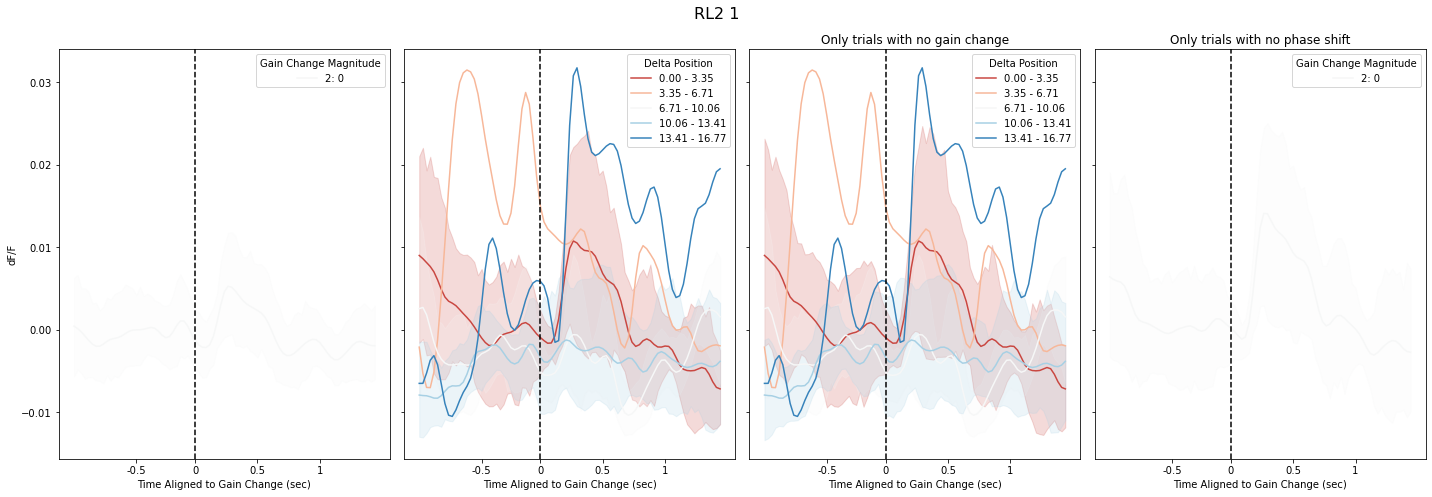

In [11]:
from visualizations import trace_visualization, TraceVisualizer

# Last, visualize data for a mouse to see how things look 
key = {"prefix" : 'RL2',"mouse_id":1}
trace_visualization(key, pooling = 'mouse')

In [12]:
mouse_id = 1
RL_id = 'RL1'

mice = [{"prefix" : "RL1" , "mouse_id" : 1},
        {"prefix" : "RL2" , "mouse_id" : 1},
        {"prefix" : "RL1" , "mouse_id" : 2},
        {"prefix" : "RL1" , "mouse_id" : 3},
        {"prefix" : "RL1" , "mouse_id" : 4},
        {"prefix" : "RL1" , "mouse_id" : 5},
        {"prefix" : "RL2" , "mouse_id" : 5},
        ]

# for mouse in mice :
mouse = {"prefix" : "RL2" , "mouse_id" : 1}
print(mouse)
mouse_id = mouse["mouse_id"]
RL_id = mouse['prefix']
uid =  RL_id+"_"+str(mouse_id)
key = {"prefix" : RL_id, "mouse_id":mouse_id}
TV = TraceVisualizer(key,pooling="mouse")
data = TV.process_data()
data['uid'] = uid
print(data.shape)
#data.to_csv('mice_data_'+uid+'.csv')

{'prefix': 'RL2', 'mouse_id': 1}
dt 0.03
dt 0.03
(1328, 11)


In [13]:
data

,Gain Change Magnitude,Delta Position,Delta Position value,Gain Pre,Gain Post,session_number,trial_number,Time Aligned to Gain Change (sec),dF/F,true_time,uid
0,2: 0,10.06 - 13.41,12.355086,1.0,1.0,0,1,0,-0.011465,-1.0,RL2_1
1,2: 0,6.71 - 10.06,9.029253,3.0,3.0,0,2,0,0.000042,-1.0,RL2_1
2,2: 0,6.71 - 10.06,8.252615,0.3,0.3,0,3,0,0.004462,-1.0,RL2_1
3,2: 0,0.00 - 3.35,2.778564,1.0,1.0,0,4,0,0.034052,-1.0,RL2_1
4,2: 0,0.00 - 3.35,0.098897,3.0,3.0,0,5,0,-0.001047,-1.0,RL2_1
...,...,...,...,...,...,...,...,...,...,...,...
1323,2: 0,0.00 - 3.35,1.986084,0.3,0.3,0,12,82,0.001246,1.46,RL2_1
1324,2: 0,10.06 - 13.41,12.807878,1.0,1.0,0,13,82,-0.013131,1.46,RL2_1
1325,2: 0,10.06 - 13.41,13.216185,3.0,3.0,0,14,82,0.006787,1.46,RL2_1
1326,2: 0,0.00 - 3.35,1.537434,1.0,1.0,0,15,82,-0.002573,1.46,RL2_1


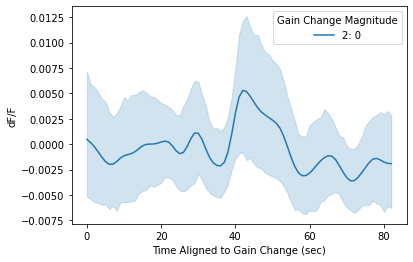

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.lineplot(
            x="Time Aligned to Gain Change (sec)",
            y="dF/F",
            hue="Gain Change Magnitude",
            data=data
        )
plt.show()

In [15]:
from visualization_utils import get_gain_change_data
import numpy as np
import pandas as pd

# now gather data within time window to get pt estimates 
time_pre = 0
time_post = 0.75
gain_change_magnitudes , delta_position , gain_pre , gain_post , gain_change_psth , _ , _ , _ , _ = get_gain_change_data({"prefix" : 1},'all',time_pre,time_post)
print(gain_change_psth.shape)
mean_signal = gain_change_psth.sum(axis = 1)

# bin delta position around max potential delta  
n_delta_position_bins = 5
sinusoid_frequency = 50/3 # from romain 
delta_position_binEdges = np.linspace(0,sinusoid_frequency + .1,n_delta_position_bins + 1)
delta_position_digitized = np.digitize(delta_position,delta_position_binEdges) - 1 
bin_names = ["%.2f - %.2f"%tuple(delta_position_binEdges[[i,i+1]]) for i in range(len(delta_position_binEdges)- 1)] 
delta_position_discr = np.full(len(delta_position_digitized),"              ")
for i_bin in range(n_delta_position_bins): 
    delta_position_discr[delta_position_digitized == i_bin] = np.full(len(delta_position_discr[delta_position_digitized == i_bin]),bin_names[i_bin])
delta_position_discr = pd.Categorical(delta_position_discr,categories=bin_names,ordered=True)

# pandas dataframe it 
signal_name = 'dF/F %.2f-%.2f'%(time_pre,time_post)
gain_change_df = pd.DataFrame({signal_name : mean_signal}) 
gain_change_df['Gain Change Magnitude'] = gain_change_magnitudes 
gain_change_df['Delta Position'] = delta_position_discr
gain_change_df['Gain Pre'] = gain_pre 
gain_change_df['Gain Post'] = gain_post


dt 0.03
(421, 25)


In [16]:
gain_change_df["Gain Change Magnitude"].unique()

array(['1: +', '4: --', '3: -', '0: ++', '2: 0'], dtype=object)

<AxesSubplot:xlabel='Gain Change Magnitude', ylabel='dF/F 0.00-0.75'>

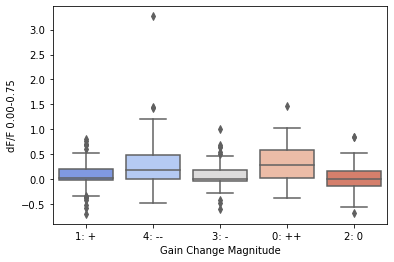

In [17]:
import seaborn as sns
sns.boxplot(x = "Gain Change Magnitude", y = signal_name, data = gain_change_df,palette = 'coolwarm')
# sns.scatterplot(x = "Gain Change Magnitude", y = signal_name, data = gain_change_df,palette = 'coolwarm')